## Training a Convolutional Neural Network on 10 Classes from the CIFAR10 dataset.

### import all necessary python modules

In [1]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### set hyperparameters

In [0]:
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True

### get training and testing data formatted

In [29]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### building the model and outputting a summary

In [30]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
__________

### use data augmentation for training

In [4]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

Using real-time data augmentation.


### train the model

In [6]:
    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=1)

Epoch 1/20
1563/1563 [==============================] - 60s 38ms/step - loss: 1.2867 - acc: 0.5381 - val_loss: 1.1561 - val_acc: 0.5888
Epoch 2/20
 183/1563 [==>...........................] - ETA: 48s - loss: 1.2820 - acc: 0.5376

1563/1563 [==============================] - 60s 39ms/step - loss: 1.2330 - acc: 0.5630 - val_loss: 1.0855 - val_acc: 0.6115
Epoch 3/20
 366/1563 [======>.......................] - ETA: 32s - loss: 1.2031 - acc: 0.5750

1563/1563 [==============================] - 45s 29ms/step - loss: 1.1912 - acc: 0.5767 - val_loss: 1.0564 - val_acc: 0.6271
Epoch 4/20
 480/1563 [========>.....................] - ETA: 29s - loss: 1.1621 - acc: 0.5886

1563/1563 [==============================] - 45s 29ms/step - loss: 1.1522 - acc: 0.5943 - val_loss: 1.0531 - val_acc: 0.6320
Epoch 5/20
 521/1563 [=========>....................] - ETA: 28s - loss: 1.1417 - acc: 0.5957

1563/1563 [==============================] - 45s 29ms/step - loss: 1.1185 - acc: 0.6078 - val_loss: 1.0373 - val_acc: 0.6373
Epoch 6/20
 536/1563 [=========>....................] - ETA: 28s - loss: 1.1058 - acc: 0.6080

1563/1563 [==============================] - 45s 29ms/step - loss: 1.0919 - acc: 0.6163 - val_loss: 0.9760 - val_acc: 0.6553
Epoch 7/20
 543/1563 [=========>....................] - ETA: 28s - loss: 1.0683 - acc: 0.6233

1563/1563 [==============================] - 45s 29ms/step - loss: 1.0592 - acc: 0.6296 - val_loss: 0.9559 - val_acc: 0.6615
Epoch 8/20
 543/1563 [=========>....................] - ETA: 28s - loss: 1.0412 - acc: 0.6343

1563/1563 [==============================] - 45s 29ms/step - loss: 1.0360 - acc: 0.6381 - val_loss: 0.9152 - val_acc: 0.6794
Epoch 9/20
 545/1563 [=========>....................] - ETA: 28s - loss: 1.0116 - acc: 0.6469

1563/1563 [==============================] - 45s 29ms/step - loss: 1.0068 - acc: 0.6471 - val_loss: 0.8991 - val_acc: 0.6868
Epoch 10/20
 542/1563 [=========>....................] - ETA: 28s - loss: 0.9965 - acc: 0.6496

1563/1563 [==============================] - 45s 29ms/step - loss: 0.9886 - acc: 0.6526 - val_loss: 0.8943 - val_acc: 0.6881
Epoch 11/20
 541/1563 [=========>....................] - ETA: 28s - loss: 0.9862 - acc: 0.6561

1563/1563 [==============================] - 45s 29ms/step - loss: 0.9712 - acc: 0.6595 - val_loss: 0.8567 - val_acc: 0.6997
Epoch 12/20
 538/1563 [=========>....................] - ETA: 28s - loss: 0.9568 - acc: 0.6680

1563/1563 [==============================] - 45s 29ms/step - loss: 0.9553 - acc: 0.6666 - val_loss: 0.8346 - val_acc: 0.7115
Epoch 13/20
 541/1563 [=========>....................] - ETA: 27s - loss: 0.9350 - acc: 0.6768

1563/1563 [==============================] - 45s 29ms/step - loss: 0.9411 - acc: 0.6750 - val_loss: 0.8142 - val_acc: 0.7171
Epoch 14/20
 540/1563 [=========>....................] - ETA: 27s - loss: 0.9421 - acc: 0.6730

1563/1563 [==============================] - 45s 29ms/step - loss: 0.9287 - acc: 0.6775 - val_loss: 0.8335 - val_acc: 0.7142
Epoch 15/20
 543/1563 [=========>....................] - ETA: 28s - loss: 0.9153 - acc: 0.6799

1563/1563 [==============================] - 45s 29ms/step - loss: 0.9152 - acc: 0.6808 - val_loss: 0.8602 - val_acc: 0.7017
Epoch 16/20
 540/1563 [=========>....................] - ETA: 28s - loss: 0.9118 - acc: 0.6845

1563/1563 [==============================] - 45s 29ms/step - loss: 0.9064 - acc: 0.6862 - val_loss: 0.8061 - val_acc: 0.7226
Epoch 17/20
 541/1563 [=========>....................] - ETA: 28s - loss: 0.8940 - acc: 0.6911

1563/1563 [==============================] - 45s 29ms/step - loss: 0.8990 - acc: 0.6895 - val_loss: 0.7552 - val_acc: 0.7420
Epoch 18/20
 538/1563 [=========>....................] - ETA: 28s - loss: 0.8893 - acc: 0.6868

1563/1563 [==============================] - 45s 29ms/step - loss: 0.8932 - acc: 0.6889 - val_loss: 0.7643 - val_acc: 0.7400
Epoch 19/20
 542/1563 [=========>....................] - ETA: 28s - loss: 0.8828 - acc: 0.6976

1563/1563 [==============================] - 45s 29ms/step - loss: 0.8796 - acc: 0.6965 - val_loss: 0.7890 - val_acc: 0.7272
Epoch 20/20
 541/1563 [=========>....................] - ETA: 28s - loss: 0.8795 - acc: 0.6985

1563/1563 [==============================] - 45s 29ms/step - loss: 0.8823 - acc: 0.6967 - val_loss: 0.7688 - val_acc: 0.7403


### evaluate model performance

In [7]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 159us/step
Test loss: 0.7688165987968445
Test accuracy: 0.7403


### compare predictions to the input data

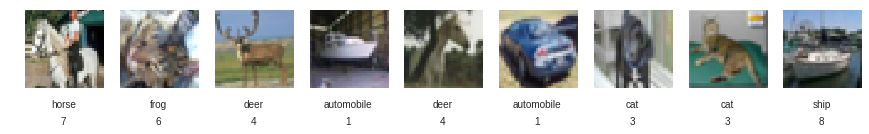

In [28]:
class_mapping = {0 : "airplane", 1 : "automobile", 2 : "bird", 3 : "cat", 4 : "deer", 5 : "dog", 6 : "frog", 7 : "horse", 8 : "ship", 9 : "truck"}

w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 9
rows = 1
indices = np.random.randint(len(x_test), size=(10))
labels = np.argmax(model.predict(x_test[indices]), axis=1)
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_test[indices[i-1]].reshape((32, 32, 3)))
    plt.axis('off')
    plt.text(15,38, class_mapping[labels[i-1]],  horizontalalignment='center', verticalalignment='center')
    plt.text(15,45, labels[i-1],  horizontalalignment='center', verticalalignment='center')
plt.show()

### look at a confusion matrix to see what was wrong with the model

class_mapping = {0 : "airplane", 1 : "automobile", 2 : "bird", 3 : "cat", 4 : "deer", 5 : "dog", 6 : "frog", 7 : "horse", 8 : "ship", 9 : "truck"}


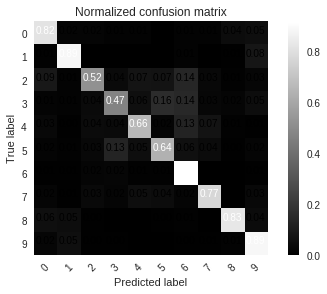

In [24]:
from sklearn.metrics import confusion_matrix
import itertools

n_classes = 10

Y_val_pred = np.argmax(model.predict(x_test), axis=1)
Y_val_real = np.argmax(y_test, axis=1)
cm = confusion_matrix(Y_val_real, Y_val_pred)
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.imshow(cm, cmap = 'gray')
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, np.arange(n_classes), rotation=45)
plt.yticks(tick_marks, np.arange(n_classes))

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.axis('off')
plt.grid(b=None, which='major', axis='both')